In [199]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def find_flare_points(timestamps, flux_values):
    """ 
    Given a list of timestamps and corresponding flux_values, 
    applies a simple 2.5 standard deviation thresholding 
    to identify points that are above 2.5 std.
    Returns array of outlier timestamps, and array of outlier flux values
    """
    f_std = np.std(flux_values)
    f_med = np.median(flux_values)
    outlier_f = []
    outlier_t = []
    
    for nt, nf in zip(timestamps, flux_values):
        if nf > f_med + 2.5 * f_std:
            outlier_f.append(nf)
            outlier_t.append(nt)
            
    return outlier_t, outlier_f


In [200]:
AMPLITUDE_COEFF = 0.01 #0.0075 
num_points = 50

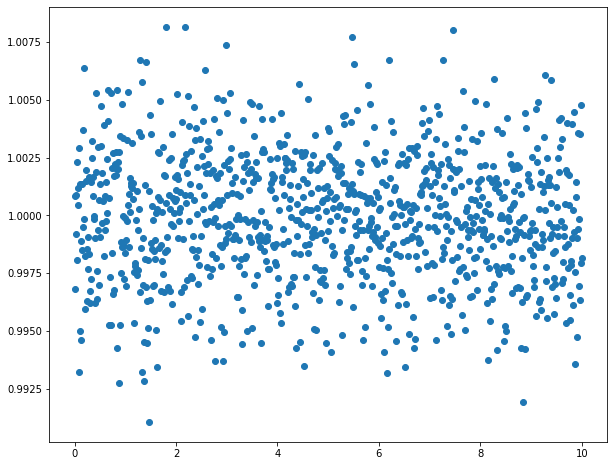

In [201]:
val = np.random.normal(1, 0.002796118344042057, 1000)
t = np.linspace(0, 10, 1000)
plt.figure(figsize=(10,8))
plt.scatter(t, val)

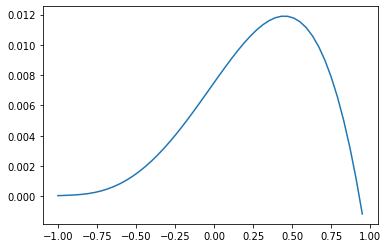

In [202]:
x = np.linspace(-1, 0.95, num_points)
coeffs = np.array([1, 1.941, -0.175, -2.246, -1.125])
y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x]) * 0.0075 
plt.plot(x, y)
plt.show()

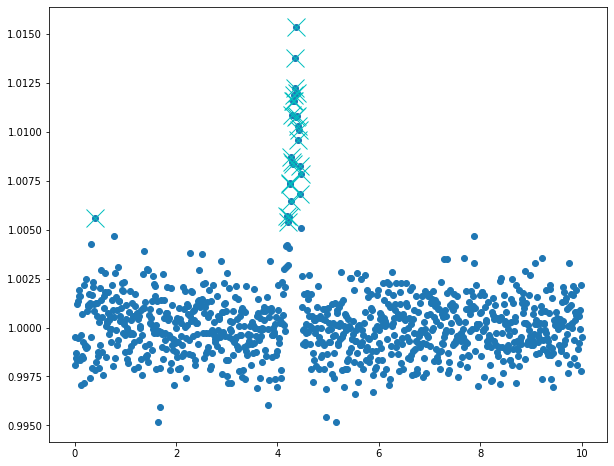

In [203]:
val = np.random.normal(1, 0.0015, 1000)
val[400:400+num_points] += y
t = np.linspace(0, 10, 1000)
# plt.figure(figsize=(10,8))
# plt.scatter(t, val)

f_std = np.std(val)
f_med = np.median(val)
outlier_f = []
outlier_t = []
for nt, nf in zip(t, val):
    if nf > f_med + 2.5 * f_std:
        outlier_f.append(nf)
        outlier_t.append(nt)

# print(f_std)
# print(f_med)

plt.figure(figsize=(10,8))
plt.scatter(t, val)
plt.plot(outlier_t, outlier_f, "cx", markersize=18, label="Outlier Data")

In [247]:
AMPLITUDE_COEFF = 300

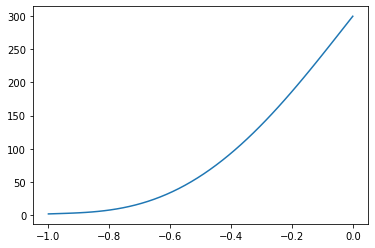

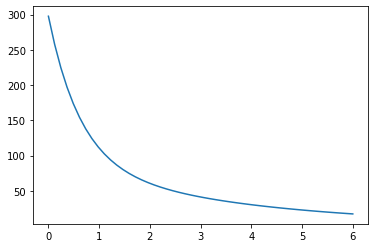

In [248]:
x_rise = np.linspace(-1, 0, num_points)
coeffs = np.array([1, 1.941, -0.175, -2.246, -1.125])
y_rise = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_rise]) * AMPLITUDE_COEFF
plt.plot(x_rise, y_rise)
plt.show()

x_decay = np.linspace(0, 6, num_points)
c_coeffs = [0.6890, 0.3030]
e_coeffs = [-1.600, -0.2783]
coeffs = [[0.6890, -1.600], [0.3030, -0.2783]]
y_decay = np.array([np.sum(np.array([coeffs[i][0]*np.exp(coeffs[i][1]*j) for i in range(len(coeffs))])) for j in x_decay]) * AMPLITUDE_COEFF 
plt.plot(x_decay, y_decay)
plt.show()

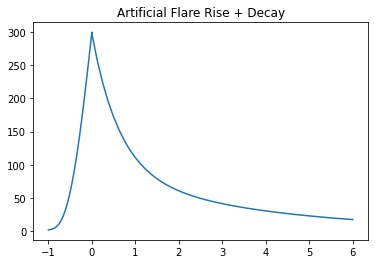

In [249]:
x = np.append(x_rise, x_decay)
y = np.append(y_rise, y_decay)
plt.plot(x, y)
plt.title("Artificial Flare Rise + Decay")
plt.show()

Text(0.5, 1.0, 'injected flare, outliers using simple 2.5 std rule')

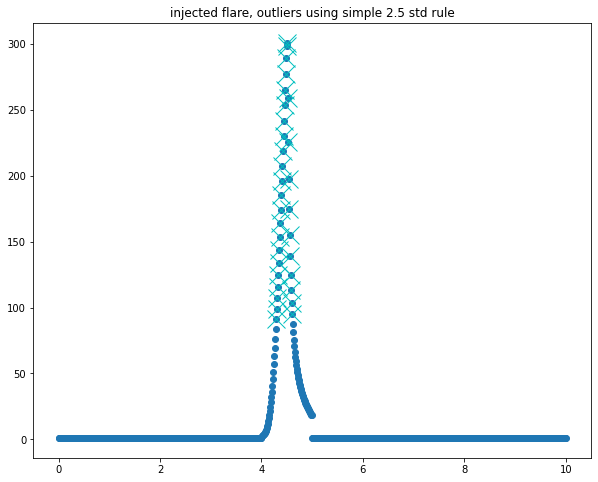

In [252]:
# INJECTED FLARE ONLY
val = np.random.normal(1, 0.0015, 1000)
val[400:400+num_points*2] += y
t = np.linspace(0, 10, 1000)

f_std = np.std(val)
f_med = np.median(val)
outlier_f = []
outlier_t = []
for nt, nf in zip(t, val):
    if nf > f_med + 2.5 * f_std:
        outlier_f.append(nf)
        outlier_t.append(nt)

plt.figure(figsize=(10,8))
plt.scatter(t, val)
plt.plot(outlier_t, outlier_f, "cx", markersize=18, label="Outlier Data")
plt.title("injected flare, outliers using simple 2.5 std rule")

In [253]:
headers

array(['HJD', 'LC', 'FWHM_X', 'FWHM_Y', 'AIRMASS', 'FWHM'], dtype='<U7')

In [254]:
from lib.Functions import ReadTxtData
headers, values = ReadTxtData('data', 'TRAPPIST1Data')
# Crop to wanted range
t = values[450:-100, 0]
val = values[450:-100, 1]

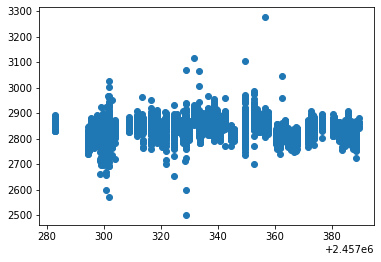

In [255]:
plt.scatter(t, val)

Text(0.5, 1.0, 'TRAPPIST1 normal data, outliers using simple 2.5 std rule')

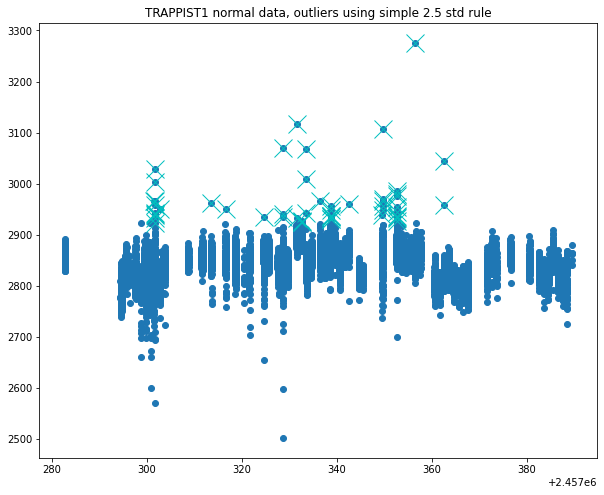

In [256]:
# JUST TRAPPIST1 DATA

f_std = np.std(val)
f_med = np.median(val)
outlier_f = []
outlier_t = []
for nt, nf in zip(t, val):
    if nf > f_med + 2.5 * f_std:
        outlier_f.append(nf)
        outlier_t.append(nt)

plt.figure(figsize=(10,8))
plt.scatter(t, val)
plt.plot(outlier_t, outlier_f, "cx", markersize=18, label="Outlier Data")
plt.title("TRAPPIST1 normal data, outliers using simple 2.5 std rule")

In [257]:
# INJECT ARTIFICIAL FLARE
val[6000:6100] = val[6000:6100] + y

Text(0.5, 1.0, 'TRAPPIST1 normal data + injected flare, outliers using simple 2.5 std rule')

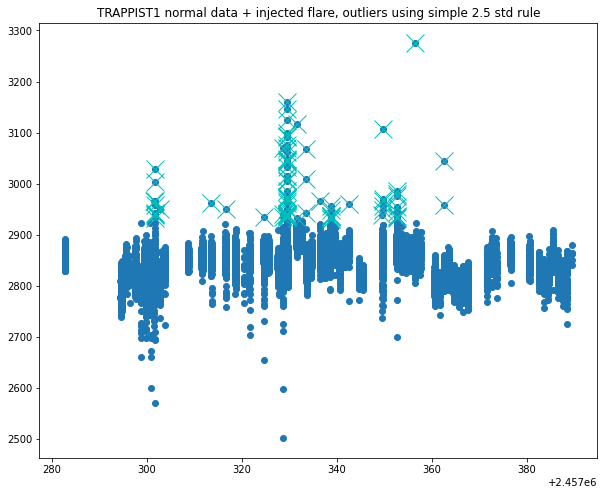

In [258]:
f_std = np.std(val)
f_med = np.median(val)
outlier_f = []
outlier_t = []
for nt, nf in zip(t, val):
    if nf > f_med + 2.5 * f_std:
        outlier_f.append(nf)
        outlier_t.append(nt)

plt.figure(figsize=(10,8))
plt.scatter(t, val)
plt.plot(outlier_t, outlier_f, "cx", markersize=18, label="Outlier Data")
plt.title("TRAPPIST1 normal data + injected flare, outliers using simple 2.5 std rule")

In [259]:
def find_flare_points(timestamps, flux_values):
    """ 
    Given a list of timestamps and corresponding flux_values, 
    applies a simple 2.5 standard deviation thresholding 
    to identify points that are above 2.5 std.
    Returns array of outlier timestamps, and array of outlier flux values
    """
    f_std = np.std(flux_values)
    f_med = np.median(flux_values)
    outlier_f = []
    outlier_t = []
    
    for nt, nf in zip(timestamps, flux_values):
        if nf > f_med + 2.5 * f_std:
            outlier_f.append(nf)
            outlier_t.append(nt)
            
    return outlier_t, outlier_f


In [260]:
find_flare_points(t, val)

([2457301.55636,
  2457301.74528,
  2457301.76111,
  2457301.77477,
  2457301.77866,
  2457301.77942,
  2457301.79525,
  2457301.79834,
  2457301.7991,
  2457302.80856,
  2457313.576,
  2457316.67964,
  2457324.71199,
  2457328.6596,
  2457328.69564,
  2457328.69793,
  2457329.58846,
  2457329.58922,
  2457329.58998,
  2457329.59075,
  2457329.59151,
  2457329.59227,
  2457329.59303,
  2457329.59379,
  2457329.59455,
  2457329.59531,
  2457329.59607,
  2457329.59679,
  2457329.59755,
  2457329.59831,
  2457329.59907,
  2457329.60208,
  2457329.60284,
  2457329.6036,
  2457329.60436,
  2457329.60512,
  2457329.60589,
  2457329.60665,
  2457329.60741,
  2457329.60817,
  2457329.60893,
  2457329.60969,
  2457329.61045,
  2457329.61121,
  2457329.61197,
  2457329.61273,
  2457329.61349,
  2457329.61425,
  2457331.67271,
  2457331.73781,
  2457333.51194,
  2457333.51271,
  2457333.51348,
  2457336.53666,
  2457338.7009,
  2457338.70166,
  2457338.70624,
  2457338.70852,
  2457338.7108,
  24